In [72]:
import pandas as pd

datos = pd.read_csv("data/carros.csv")
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [73]:
#Situación con los ordenes de la peor manera
datos_ord  = datos.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_del_modelo", "km_by_year"]]
y_ord =datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [74]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [75]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [76]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [77]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [78]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [79]:
# GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [80]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [81]:
modelo

DecisionTreeClassifier(max_depth=2)

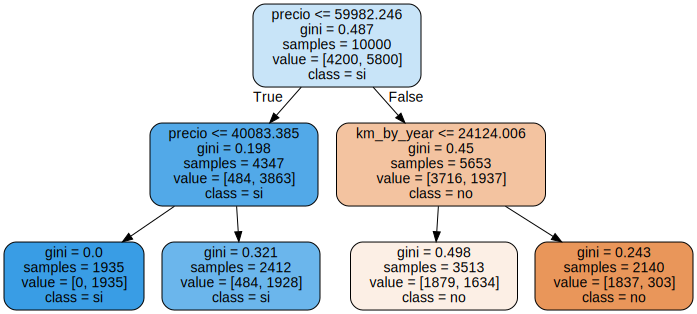

In [82]:
from sklearn.tree import export_graphviz
import graphviz 

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["no","si"],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [83]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


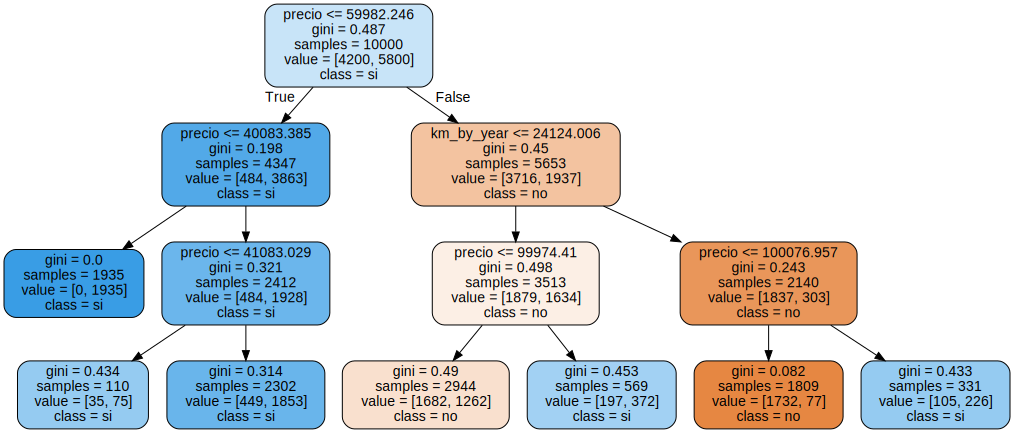

In [84]:
from sklearn.tree import export_graphviz
import graphviz 

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["no","si"],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [85]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.19
Intervalo [75.26, 79.13]


# Probando Parámetros

In [86]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results["test_score"].mean()*100
  train_score = results["train_score"].mean()*100
  print("arbol max_depth = %d, training = %.2f, testing = %.2f" % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados = [iniciar_arbol_de_decision(i) for i in range(1, 33)]
resultados = pd.DataFrame(resultados, columns=["max_depth", "train", "test"])
resultados.head()

arbol max_depth = 1, training = 75.79, testing = 75.78
arbol max_depth = 2, training = 75.79, testing = 75.78
arbol max_depth = 3, training = 78.75, testing = 78.67
arbol max_depth = 4, training = 78.79, testing = 78.63
arbol max_depth = 5, training = 78.94, testing = 78.56
arbol max_depth = 6, training = 79.17, testing = 78.12
arbol max_depth = 7, training = 79.50, testing = 77.96
arbol max_depth = 8, training = 79.89, testing = 77.86
arbol max_depth = 9, training = 80.46, testing = 77.38
arbol max_depth = 10, training = 81.16, testing = 77.19
arbol max_depth = 11, training = 82.03, testing = 76.97
arbol max_depth = 12, training = 82.89, testing = 76.49
arbol max_depth = 13, training = 83.95, testing = 75.81
arbol max_depth = 14, training = 85.03, testing = 75.66
arbol max_depth = 15, training = 86.14, testing = 75.16
arbol max_depth = 16, training = 87.19, testing = 75.11
arbol max_depth = 17, training = 88.31, testing = 74.74
arbol max_depth = 18, training = 89.26, testing = 74.33
a

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


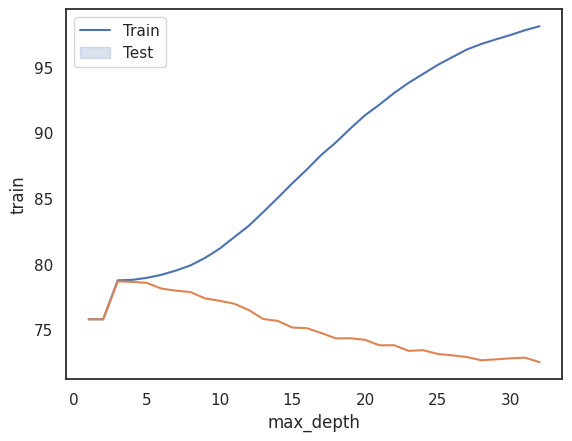

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="max_depth", y="train",data=resultados)
sns.lineplot(x="max_depth", y="test",data=resultados)
plt.legend(["Train","Test"])

In [88]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


In [89]:
for x in range(1, 64):
    for y in range(1, 64):
        print("max_depht: "+ str(x)+ " - min_depth_leaf: " + str(y))

max_depht: 1 - min_depth_leaf: 1
max_depht: 1 - min_depth_leaf: 2
max_depht: 1 - min_depth_leaf: 3
max_depht: 1 - min_depth_leaf: 4
max_depht: 1 - min_depth_leaf: 5
max_depht: 1 - min_depth_leaf: 6
max_depht: 1 - min_depth_leaf: 7
max_depht: 1 - min_depth_leaf: 8
max_depht: 1 - min_depth_leaf: 9
max_depht: 1 - min_depth_leaf: 10
max_depht: 1 - min_depth_leaf: 11
max_depht: 1 - min_depth_leaf: 12
max_depht: 1 - min_depth_leaf: 13
max_depht: 1 - min_depth_leaf: 14
max_depht: 1 - min_depth_leaf: 15
max_depht: 1 - min_depth_leaf: 16
max_depht: 1 - min_depth_leaf: 17
max_depht: 1 - min_depth_leaf: 18
max_depht: 1 - min_depth_leaf: 19
max_depht: 1 - min_depth_leaf: 20
max_depht: 1 - min_depth_leaf: 21
max_depht: 1 - min_depth_leaf: 22
max_depht: 1 - min_depth_leaf: 23
max_depht: 1 - min_depth_leaf: 24
max_depht: 1 - min_depth_leaf: 25
max_depht: 1 - min_depth_leaf: 26
max_depht: 1 - min_depth_leaf: 27
max_depht: 1 - min_depth_leaf: 28
max_depht: 1 - min_depth_leaf: 29
max_depht: 1 - min_dept

# Explorando hiper-parámetros en dos dimensiones

In [90]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results["test_score"].mean()*100
  train_score = results["train_score"].mean()*100
  print("Arbol max_depth = %d, min_samples_leaf = %d, training = %.2f, testing = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
    resultados = []
    for max_depth in range(1, 32):
        for min_samples_leaf in [32, 64, 128, 256]: #range(1, 32):
            tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
            resultados.append(tabla)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
    return resultados

resultados = buscar()
resultados.head()


Arbol max_depth = 1, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 32, training = 78.

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [91]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.750993,78.672633
8,3,32,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633


In [92]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-2.819789e-16,0.546146,-0.024381
min_samples_leaf,-2.819789e-16,1.000000e+00,-0.401773,0.341805
train,5.461464e-01,-4.017734e-01,1.000000,0.133720
test,-2.438091e-02,3.418055e-01,0.133720,1.000000


<Axes: >

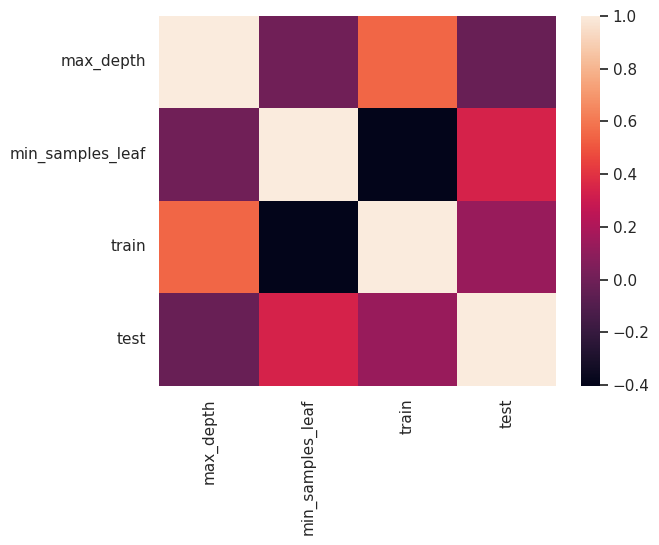

In [93]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

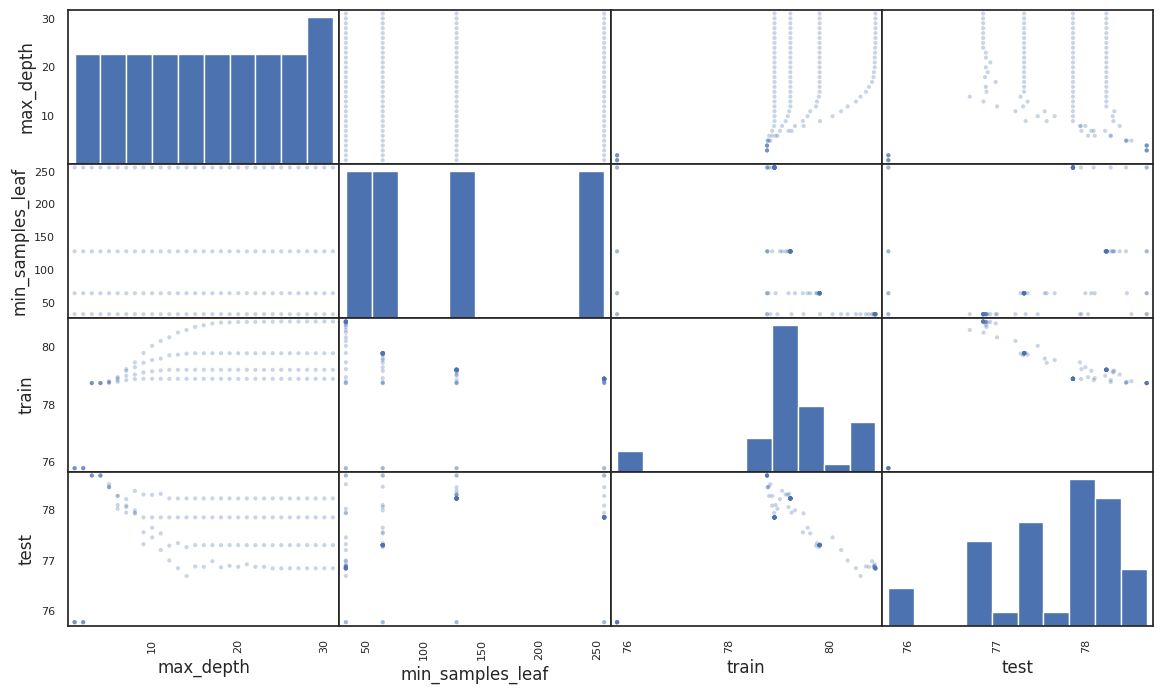

In [94]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

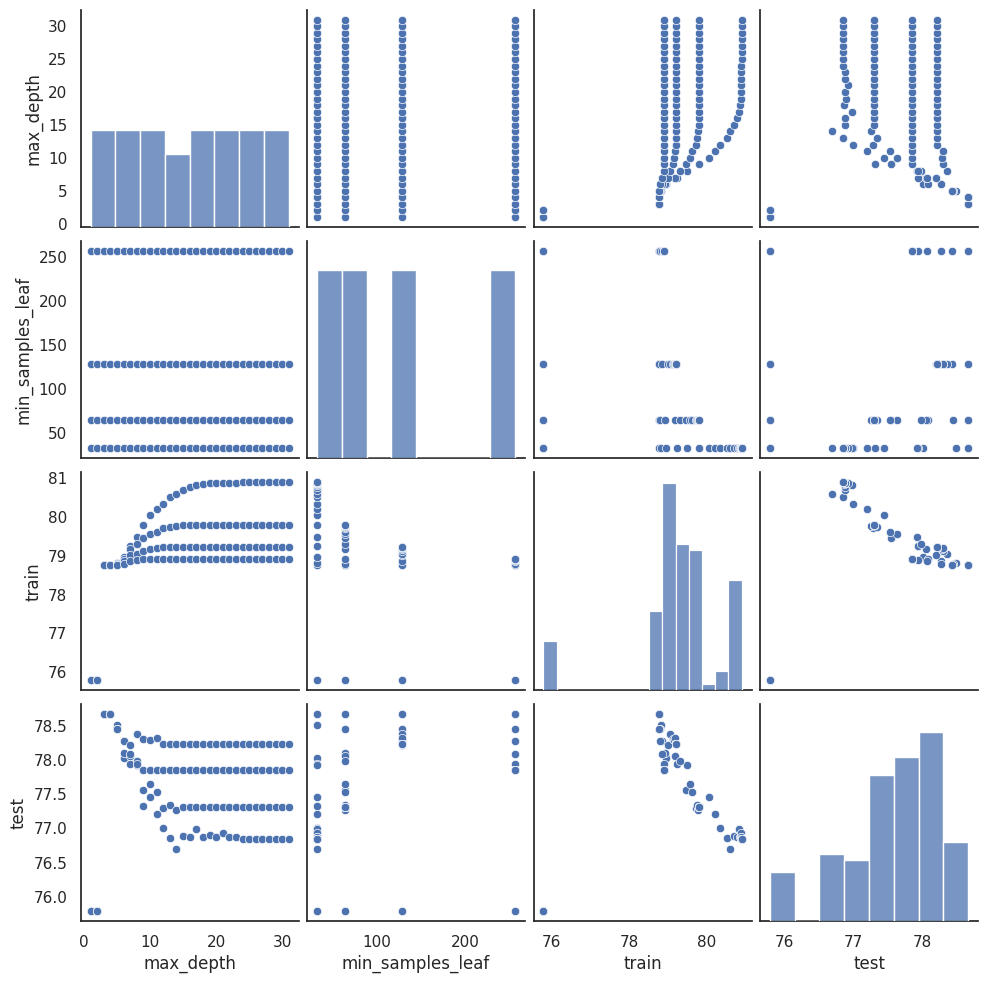

In [95]:
sns.pairplot(resultados)

<Axes: >

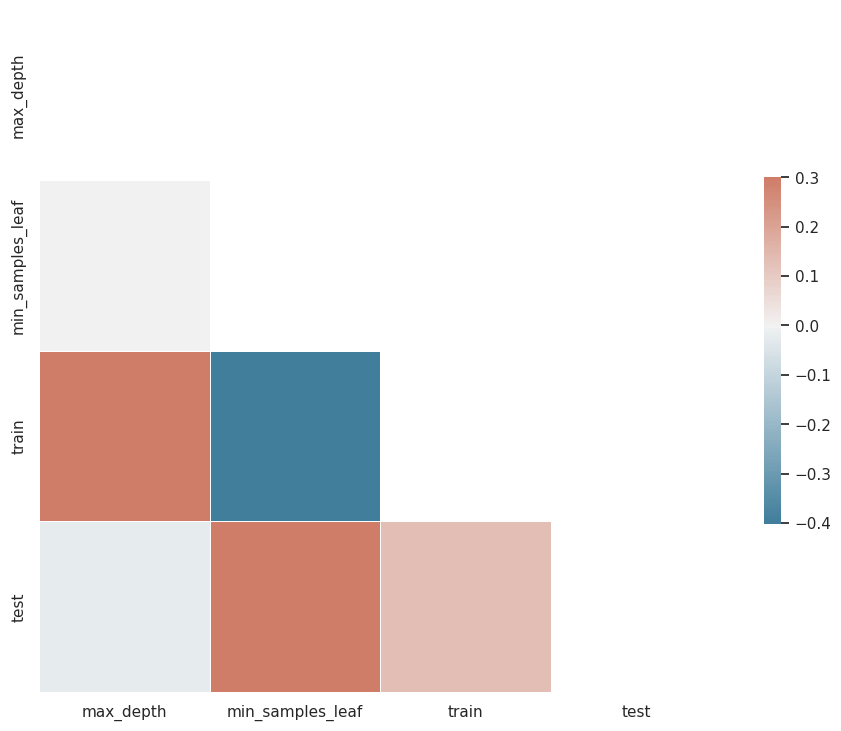

In [96]:
#Seaborn Correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

"""# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()"""

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [97]:
def buscar():
    resultados = []
    for max_depth in range(1, 10):
        for min_samples_leaf in [128, 190, 220, 256]: #range(1, 32):
            tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
            resultados.append(tabla)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "train", "test"])
    return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 128, trainin

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,190,75.791169,75.784219
2,1,220,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,128,75.791169,75.784219


In [98]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,190,78.750993,78.672633
11,3,256,78.750993,78.672633
15,4,256,78.750993,78.672633
14,4,220,78.750993,78.672633
12,4,128,78.750993,78.672633


# Explorando 3 dimenciones de hiper parámetros

In [99]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results["test_score"].mean()*100
  train_score = results["train_score"].mean()*100
  fit_time = results["fit_time"].mean()
  score_time = results["score_time"].mean()

  print("Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, training = %.2f, testing = %.2f" % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
    resultados = []
    for max_depth in range(1, 32):
        for min_samples_leaf in [32, 64, 128, 256]: #range(1, 32):
            for min_samples_split in [32, 64, 128, 256]:
                tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabla)
    resultados = pd.DataFrame(resultados, columns=["max_depth", "min_samples_leaf", "min_samples_split","train", "test","fit_time", "score_time"])
    return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32, min_samples_split = 256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, min_samples_split = 256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, min_samples_split = 64, training

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.005117,0.002118
1,1,32,64,75.791169,75.784219,0.004088,0.001261
2,1,32,128,75.791169,75.784219,0.004556,0.001443
3,1,32,256,75.791169,75.784219,0.004309,0.001509
4,1,64,32,75.791169,75.784219,0.003938,0.001523


In [100]:
corr = resultados.corr()

<Axes: >

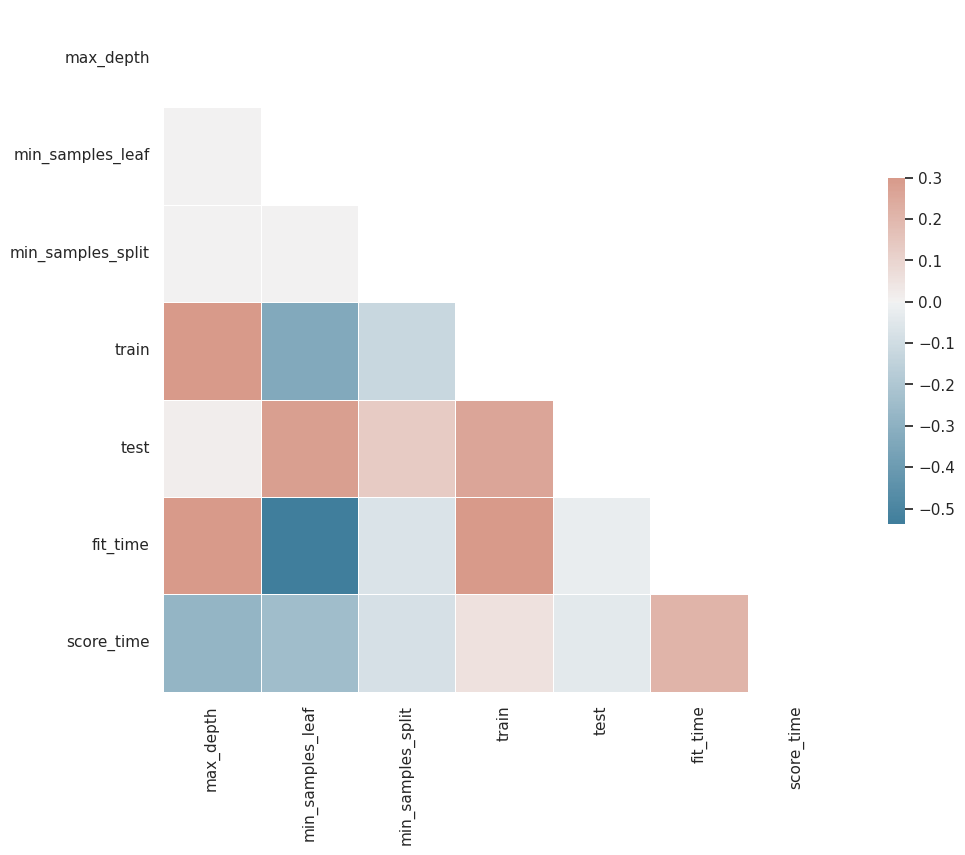

In [101]:
#Seaborn Correlation
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

"""# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()"""

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [102]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
45,3,256,64,78.750993,78.672633,0.008067,0.001318
41,3,128,64,78.750993,78.672633,0.007859,0.001201
48,4,32,32,78.750993,78.672633,0.009406,0.001199
47,3,256,256,78.750993,78.672633,0.007360,0.001185
46,3,256,128,78.750993,78.672633,0.007554,0.001240


# Explorando espacio de hiper parámetros con GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    "max_depth":[3, 5],
    "min_samples_split":[32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                    espacio_de_parametros,
                    cv = GroupKFold(n_splits= 10))
buscar.fit(x_ord, y_ord, groups = datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011433,0.005475,0.001658,0.000628,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.007559,0.000235,0.001274,0.000236,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.007751,0.000773,0.001248,0.000310,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.007444,0.000172,0.001141,0.000164,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.007573,0.000351,0.001113,0.000119,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [104]:
print(buscar.best_params_)
print(buscar.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [105]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [106]:
from sklearn.metrics import accuracy_score

prediccion =mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print("Accurary para los datos fur %.2f%%" % accuracy)

Accurary para los datos fur 78.75%


# Nested Cross Validation

In [108]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    "max_depth":[3, 5],
    "min_samples_split":[32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                    espacio_de_parametros,
                    cv = KFold(n_splits= 5, shuffle = True))

buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008074,0.001083,0.001721,0.000601,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.006935,0.000127,0.001325,0.000150,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.006793,0.000109,0.001173,0.000162,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.006639,0.000049,0.001158,0.000117,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.006666,0.000084,0.001150,0.000147,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [114]:
def imprimir_score(scores):
    media = scores.mean() * 100
    desviacion = scores.std() * 100
    print("Accurary media %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [115]:
imprimir_score(scores)

Accurary media 78.67
Intervalo [76.80, 80.54]


In [116]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

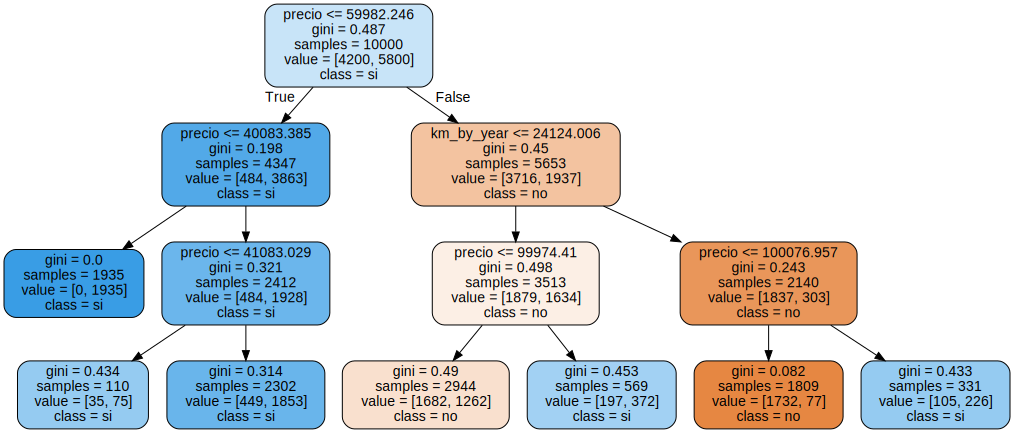

In [118]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True,
            class_names=["no", "si"],
            feature_names = features)

graph = graphviz.Source(dot_data)
graph